## Name: Sayali Nitin Doifode

Reprodicibilty is only possible through seeds.
hence set the seeds



In [ ]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

## Importing the dependencies

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Use API to get the data

Here, I have used Kaggle API since my data was over 1 GB it was giving me errors for processing. I have used the kaggle API instead

Kaggle is pre installed in google colab. Only run the next command if using jupyter

In [ ]:
#!pip install kaggle

Upload the kaggle.json file.
This is a Basic API code fill automatically generated from your kaggle account. It gives you your unique ID

In [ ]:
kaggle_API = json.load(open("kaggle.json"))

In [ ]:
# setup Kaggle API key as environment variables
os.environ['kaggle_username'] = kaggle_API["username"]
os.environ['kaggle_key'] = kaggle_API["key"]

GO to your dataset on kaggle and copy its file path and run here.

The data is lmost 2Gb. will take some second to download

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.01G/2.04G [00:18<00:00, 195MB/s]
100% 2.04G/2.04G [00:18<00:00, 118MB/s]


In [ ]:
!ls

kaggle.json		  sample_data		    test_blueberry_healthy.jpg
plantvillage-dataset.zip  test_apple_black_rot.JPG  test_potato_early_blight.jpg


Next, Extract the data in a ZIP file temperorily in the runtime to process it

In [ ]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])



['segmented', 'grayscale', 'color']
38
['Corn_(maize)___Common_rust_', 'Cherry_(including_sour)___healthy', 'Apple___Apple_scab', 'Grape___Black_rot', 'Peach___Bacterial_spot']


As we can see from the prvious command, the number of classes in the plant village dataset

**Number of Classes = 38**

The  different types of plants include Corn, Cherry, Apple, grape and peach

In [ ]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['2383094b-208b-472d-9711-e35dbee4b7b9___Mt.N.V_HL 6114.JPG', 'f5310751-1f5c-426e-9e50-52bb5b7a2145___Mt.N.V_HL 8950.JPG', 'd68b653c-4fe7-49ee-80d4-1f0c84092242___Mt.N.V_HL 6077.JPG', '0f0596ab-ea6e-472b-a7d5-0a80b1d1ebb2___Mt.N.V_HL 9011.JPG', 'b07129a6-b8b0-4715-b76f-f89bd40c6770___Mt.N.V_HL 8994.JPG']


**Data Preprocessing**

In [ ]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

try printing a couple of images.

(256, 256, 3)


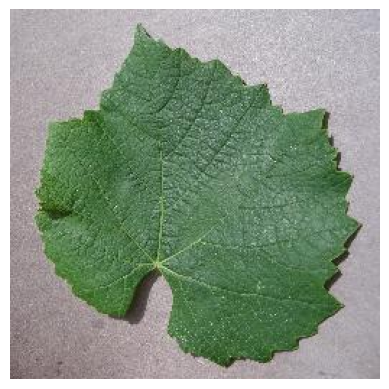

In [ ]:
image_path = '/content/plantvillage dataset/color/Grape___healthy/05cff9d7-0f63-4b6e-9aa3-199cf9ffa64c___Mt.N.V_HL 9111.JPG'
# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

The image shape is 256,256,3.
now set up the image parameter

In [ ]:
# Image Parameters
image_size = 224
batch_size = 32

Split the data into training, testing for the Sequantial model

I have split in into 0.2

In [ ]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


## Set up Convulotional neural network

I have used a Sequential model

In [ ]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [ ]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

## Use Adam optimizer to compile the model

In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Model training**

In [ ]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5
1358/1358 [==============================] - 119s 84ms/step - loss: 0.9630 - accuracy: 0.7370 - val_loss: 0.4675 - val_accuracy: 0.8554
Epoch 2/5
1358/1358 [==============================] - 106s 78ms/step - loss: 0.2809 - accuracy: 0.9110 - val_loss: 0.3922 - val_accuracy: 0.8823
Epoch 3/5
1358/1358 [==============================] - 107s 79ms/step - loss: 0.1360 - accuracy: 0.9555 - val_loss: 0.4515 - val_accuracy: 0.8802
Epoch 4/5
1358/1358 [==============================] - 100s 74ms/step - loss: 0.0901 - accuracy: 0.9710 - val_loss: 0.4649 - val_accuracy: 0.8832
Epoch 5/5
1358/1358 [==============================] - 102s 75ms/step - loss: 0.0665 - accuracy: 0.9784 - val_loss: 0.7083 - val_accuracy: 0.8567


**Model Evaluation**

In [ ]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 [==============================] - 19s 57ms/step - loss: 0.5091 - accuracy: 0.8828
Validation Accuracy: 88.28%


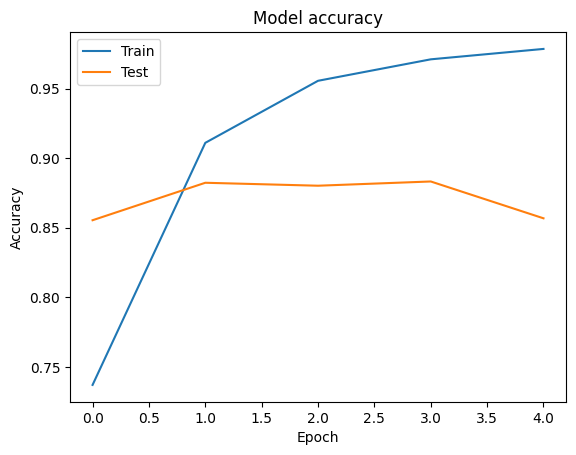

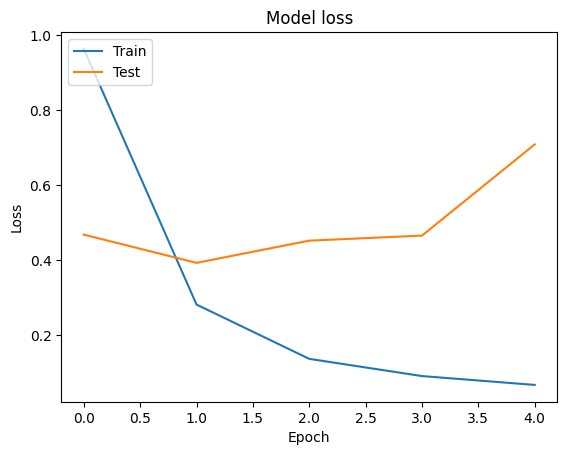

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()